In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from numba import jit
%matplotlib notebook

In [2]:
@jit(nopython=True)
def mandelbrot(largeur, hauteur, max_iteration, xmin, xmax, ymin, ymax):
    mandelbrot_mat = np.zeros((largeur, hauteur))
    for x in range(hauteur):
        cx = (x * (xmax - xmin) / hauteur + xmin)
        for y in range(largeur):
            cy = (y * (ymin - ymax) / largeur + ymax)
            xn, yn, n = 0, 0, 0
            while (xn**2 + yn**2) < 4 and n < max_iteration:
                tmp_x, tmp_y = xn, yn
                xn = tmp_x**2 - tmp_y**2 + cx
                yn = 2 * tmp_x * tmp_y + cy
                n = n + 1
            if n < max_iteration:
                mandelbrot_mat[y, x] = 1
    return mandelbrot_mat

In [3]:
Z_1 = mandelbrot(500, 500, 50, -2, 0.5, -1.25, 1.25)
Z_2 = mandelbrot(500, 500, 50, -1.7, 0.2, -0.95, 0.95)
Z_3 = mandelbrot(500, 500, 50, -1.5, 0, -0.75, 0.75)
Z_4 = mandelbrot(500, 500, 50, -1.5, -0.35, -0.57, 0.57)
Z_5 = mandelbrot(500, 500, 50, -1.44,-0.72, -0.4,0.4)
Z_6 = mandelbrot(500, 500, 50, -1.42, -0.98, -0.2, 0.2)
Z_7 = mandelbrot(500, 500, 50,  -1.42,-1.23,-0.1,0.09)
Z_8 = mandelbrot(500, 500, 50, -1.41,-1.36,-0.02,0.03)

<IPython.core.display.Javascript object>


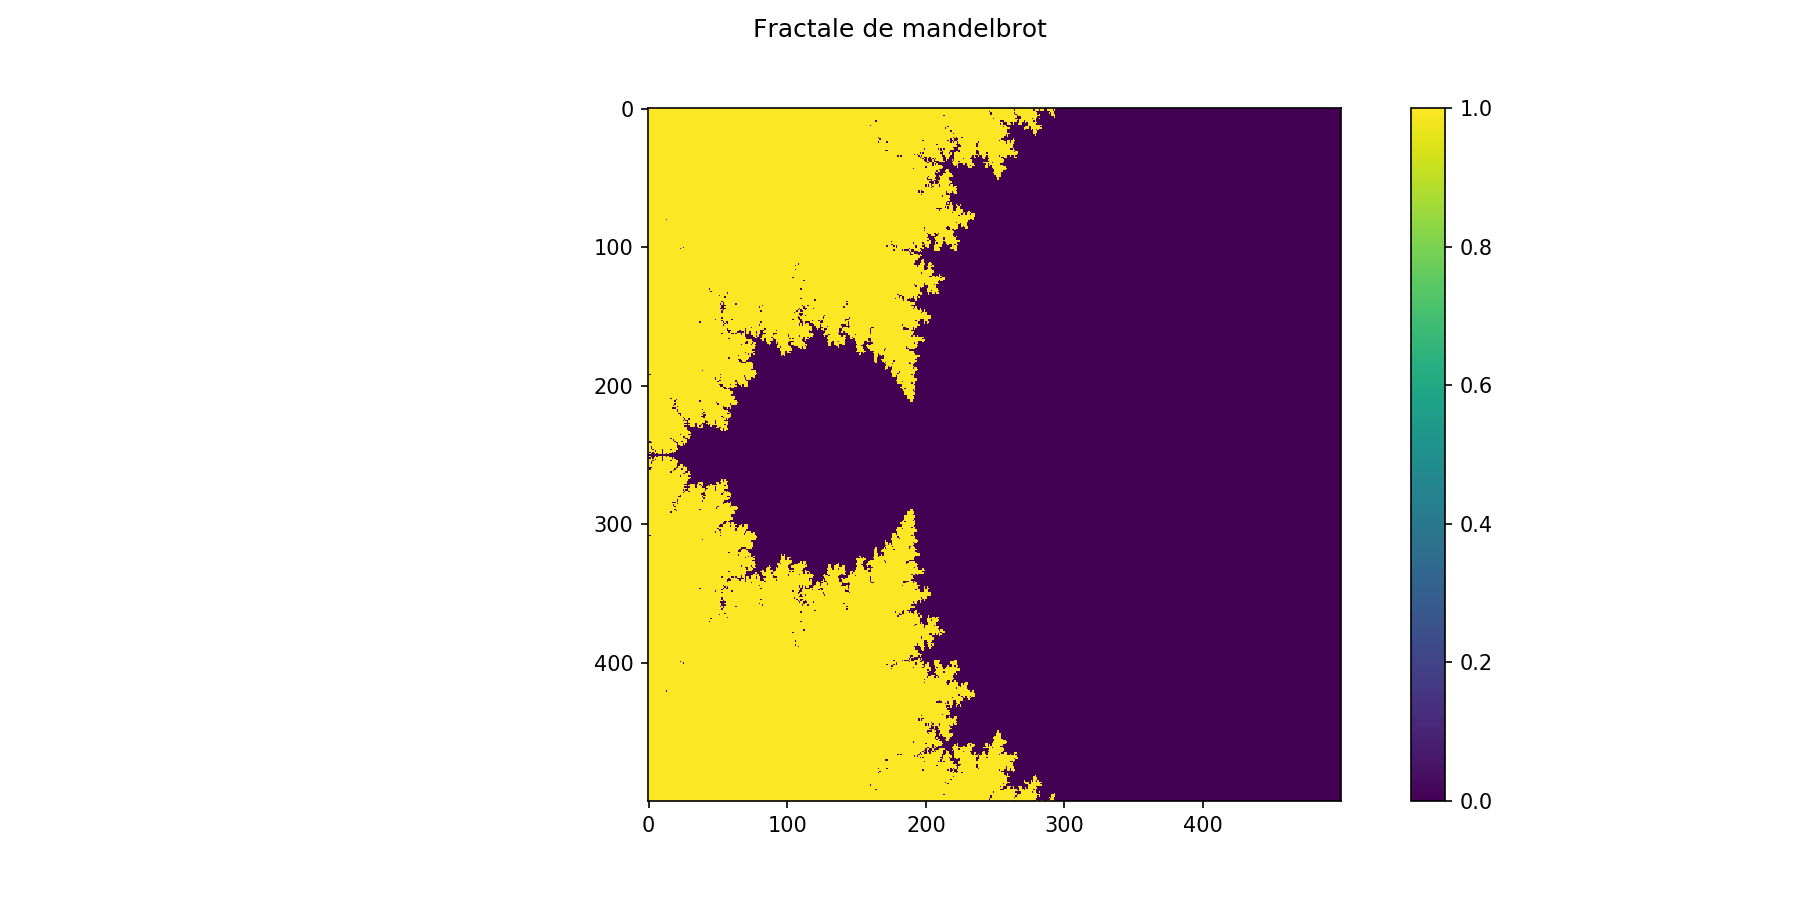

In [5]:
%matplotlib notebook
fig, ax = plt.subplots(1, 1, figsize=(12, 6),
                       sharey=True)
im = plt.imshow(Z_1)


def animate(i):
    if i == 0:
        im = plt.imshow(Z_2)
    if i == 1:
        im = plt.imshow(Z_3)
    if i == 2:
        im = plt.imshow(Z_4)
    if i == 3:
        im = plt.imshow(Z_5)
    if i==4:
        im = plt.imshow(Z_6)
    if i==5:
        im=plt.imshow(Z_7)
    if i==6:
        im=plt.imshow(Z_8)

plt.show()
plt.colorbar()
fig.suptitle("Fractale de mandelbrot")
anim = animation.FuncAnimation(
    fig, animate, frames=np.arange(11), interval=400, blit=False)